In [25]:
from azureml.core import Workspace, Dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
ws = Workspace.from_config('.azureml\config')
dataset = Dataset.get_by_name(ws,'Telecom_churn_dataset')

df = dataset.to_pandas_dataframe()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


In [27]:
df.drop(['customerID'],axis=1,inplace = True)

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
1,Male,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
2,Male,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True


In [28]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   bool   
 2   Partner           7032 non-null   bool   
 3   Dependents        7032 non-null   bool   
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   bool   
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   bool   
 16  PaymentMethod     7032 non-null   object 


In [30]:
df[df.select_dtypes(include=object).columns]=df.select_dtypes(include=object).astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   bool    
 2   Partner           7032 non-null   bool    
 3   Dependents        7032 non-null   bool    
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   bool    
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   bool    
 16  PaymentMethod     7032 n

In [31]:
df['Churn'].apply(lambda x : 1 if x=='yes' else 0)

0       0
1       0
2       0
3       0
4       0
       ..
7027    0
7028    0
7029    0
7030    0
7031    0
Name: Churn, Length: 7032, dtype: int64

In [32]:
df_cleaned = pd.get_dummies(df,drop_first=True)

In [33]:
df_cleaned[df_cleaned.select_dtypes(include=bool).columns] = df_cleaned[df_cleaned.select_dtypes(include=bool).columns].applymap(lambda x: 1 if x== True else 0)

C:\Users\Himanshu Choudhary\AppData\Local\Temp\ipykernel_16076\1816034801.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[df_cleaned.select_dtypes(include=bool).columns] = df_cleaned[df_cleaned.select_dtypes(include=bool).columns].applymap(lambda x: 1 if x== True else 0)


In [34]:
df_cleaned

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,84.80,1990.50,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7028,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7029,0,1,1,11,0,1,29.60,346.45,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7030,1,1,0,4,1,1,74.40,306.60,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
feat_importance = abs(df_cleaned.corr()['Churn']).sort_values(ascending=False)[1:]

In [36]:
feat_importance[feat_importance>0.01]

tenure                                   0.354049
InternetService_Fiber optic              0.307463
Contract_Two year                        0.301552
PaymentMethod_Electronic check           0.301455
StreamingMovies_No internet service      0.227578
OnlineBackup_No internet service         0.227578
StreamingTV_No internet service          0.227578
OnlineSecurity_No internet service       0.227578
InternetService_No                       0.227578
DeviceProtection_No internet service     0.227578
TechSupport_No internet service          0.227578
TotalCharges                             0.199484
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
Contract_One year                        0.178225
OnlineSecurity_Yes                       0.171270
TechSupport_Yes                          0.164716
Dependents                               0.163128
SeniorCitizen                            0.150541
Partner                                  0.149982


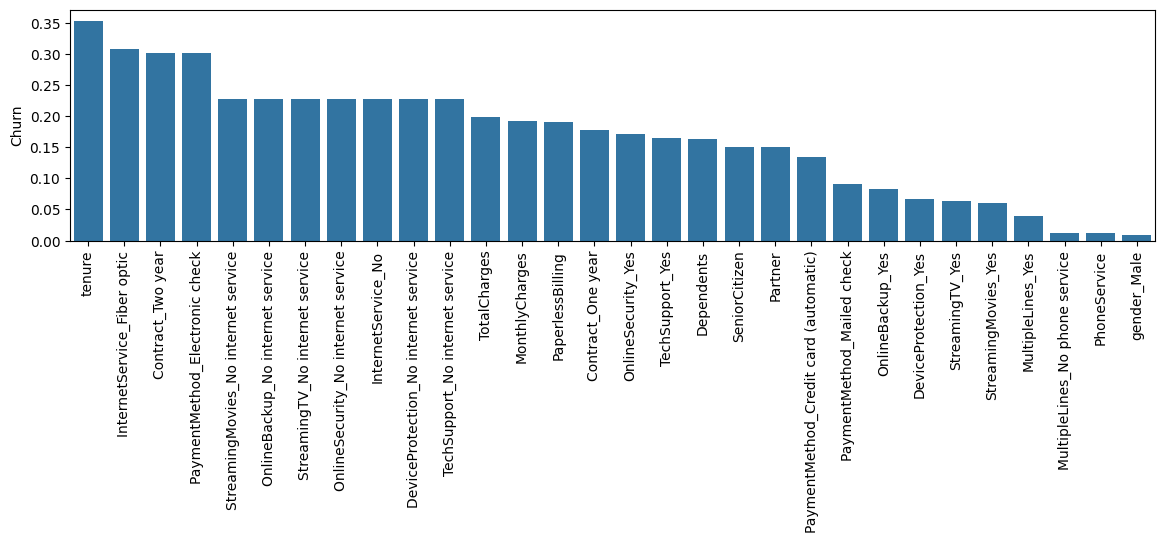

In [37]:
plt.figure(figsize=(14,3))
sns.barplot(feat_importance)
plt.xticks(rotation =90);

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()


noramlized_data = scaler.fit_transform(df_cleaned)

In [40]:
noramlized_data =pd.DataFrame(noramlized_data,columns=df_cleaned.columns)

In [41]:
noramlized_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,1.0,0.323944,1.0,1.0,0.662189,0.227521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.0,1.0,1.000000,1.0,1.0,0.845274,0.847461,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,1.0,1.0,0.140845,0.0,1.0,0.112935,0.037809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1.0,1.0,0.0,0.042254,1.0,1.0,0.558706,0.033210,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
noramlized_data.head(2)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
# Using normalized_df instead of normalized_data
X = noramlized_data.drop(['Churn'], axis=1)
y = noramlized_data['Churn']

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing setX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from azureml.core.compute import AmlCompute 
from azureml.core.compute_target import ComputeTargetException

from azureml.core import Workspace
ws =Workspace.from_config('.azureml/config')

# Definning compute configuration
compute_name = 'AML-CC-01'
provisioning_Compute_config = AmlCompute.provisioning_configuration(vm_size='Standard_DS11_v2',
                                                                    min_nodes=0,
                                                                    max_nodes=4)
# Creating compute instance 
compute_target = ComputeTarget.create(workspace=ws,
                                     name=compute_name,
                                     provisioning_configuration=provisioning_Compute_config)

SyntaxError: trailing comma not allowed without surrounding parentheses (2513768287.py, line 1)